# Text Retrieval and Extraction using Logistics Regression approach 

In [45]:
import csv
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

def extract_movie_director(review_text):
    # Use regex pattern matching to extract movie title and director name
    pattern = r"(?i)\b(directed\sby|director:)\s*([\w\s]+)"
    match = re.search(pattern, review_text)
    if match:
        return match.group(2).strip()
    else:
        return None

def is_review_or_mention(review_text, movie_title):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use machine learning-based classifier to classify as review or mention
        processed_text = preprocess_text(review_text)
        class_label = classifier.predict(vectorizer.transform([processed_text]))
        if class_label == 1:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def train_classifier(dataset):
    # Extract review text and labels from the dataset
    texts = [review['Text'] for review in dataset]
    labels = [int(bool(re.search(r"\brating|review|score|opinion\b", review['Text'], re.I))) for review in dataset]

    # Vectorize the review texts using TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texts)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Train a logistic regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Evaluate classifier performance on the testing set
    accuracy = classifier.score(X_test, y_test)
    print("Classifier Accuracy:", accuracy)

    return classifier, vectorizer

def retrieve_and_extract_movies(dataset, movie_title):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            mention_type = is_review_or_mention(review_text, movie_title)
            if mention_type == "Review":
                movie_reviews.append(review)
                review_ids.append(review['Id'])
                total_score += float(review['Rating'])
                num_reviews += 1
            elif mention_type == "Mention":
                mention_ids.append(review['Id'])

            if director_name is None:
                director_name = extract_movie_director(review_text)

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

# Example usage
dataset_path = "C:/Users/user/Desktop/text assessment 3/data_for_info_retriev_extract/Dataset_IMDB.csv"

movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']

# Load dataset from CSV file
dataset = []
with open(dataset_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dataset.append(row)

# Train the classifier
classifier, vectorizer = train_classifier(dataset)

for movie_title in movies_of_interest:
    movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title)

    print("Movie:", movie_title)
    print("Director:", director_name)
    print("Average Score:", average_score)
    print("Review IDs:", review_ids)
    print("Mention IDs:", mention_ids)
    print()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classifier Accuracy: 0.8243512974051896
Movie: The Lion King
Director: William Dear Producers
Average Score: 0.7000000000000001
Review IDs: ['24533', '12936', '18866', '23805', '9703', '3532', '4981', '3558', '3568', '5790', '3535', '5369']
Mention IDs: ['25950', '2727', '2236', '12429', '2262', '3098', '4464', '8264', '5513', '9778', '2758', '3163', '12950', '9837', '3768', '2661', '9751', '2261', '7218', '5691', '2670', '7836', '15087', '23535', '10023', '13316', '22231', '3792', '8103', '8287', '9609', '18890']

Movie: Star Wars
Director: Robert Zemeckis
Average Score: 0.6333333333333334
Review IDs: ['26895', '22584', '24561', '18485', '20185', '16619', '24553', '25020', '18433', '18767', '7114', '6979', '6383', '3852', '7163', '5100', '7536', '29716', '5049', '5055', '5592']
Mention IDs: ['4550', '7309', '12547', '2985', '2582', '12057', '3785', '5574', '3023', '2035', '4125', '11641', '4634', '7065', '3742', '7015', '7096', '7624', '11025', '5616', '6782', '6949', '7676', '2483', 

# Text Retrieval and Extraction using Sentiment Analysis, approah 2

In [46]:
import csv
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

def extract_movie_director(review_text):
    # Use regex pattern matching to extract movie title and director name
    pattern = r"(?i)\b(directed\sby|director:)\s*([\w\s]+)"
    match = re.search(pattern, review_text)
    if match:
        return match.group(2).strip()
    else:
        return None

def is_review_or_mention(review_text, sentiment_analyzer):
    # Analyze sentiment polarity of the review text
    sentiment_scores = sentiment_analyzer.polarity_scores(review_text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.1:
        return "Review"
    else:
        return "Mention"

def train_sentiment_analyzer(dataset):
    # Extract review text from the dataset
    texts = [review['Text'] for review in dataset]

    # Initialize sentiment analyzer
    sentiment_analyzer = SentimentIntensityAnalyzer()

    # Preprocess and analyze sentiment for each review text
    labels = []
    for text in texts:
        processed_text = preprocess_text(text)
        sentiment_label = is_review_or_mention(processed_text, sentiment_analyzer)
        labels.append(sentiment_label)

    return sentiment_analyzer

def retrieve_and_extract_movies(dataset, movie_title, sentiment_analyzer):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            mention_type = is_review_or_mention(review_text, sentiment_analyzer)
            if mention_type == "Review":
                movie_reviews.append(review)
                review_ids.append(review['Id'])
                total_score += float(review['Rating'])
                num_reviews += 1
            elif mention_type == "Mention":
                mention_ids.append(review['Id'])

            if director_name is None:
                director_name = extract_movie_director(review_text)

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

# Example usage
dataset_path = "C:/Users/user/Desktop/text assessment 3/data_for_info_retriev_extract/Dataset_IMDB.csv"

movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']

# Load dataset from CSV file
dataset = []
with open(dataset_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dataset.append(row)

# Train the sentiment analyzer
sentiment_analyzer = train_sentiment_analyzer(dataset)

for movie_title in movies_of_interest:
    movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title, sentiment_analyzer)

    print("Movie:", movie_title)
    print("Director:", director_name)
    print("Average Score:", average_score)
    print("Review IDs:", review_ids)
    print("Mention IDs:", mention_ids)
    print()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Movie: The Lion King
Director: William Dear Producers
Average Score: 0.6659999999999998
Review IDs: ['2727', '2236', '2262', '3098', '4464', '8264', '5513', '9778', '2758', '3163', '12950', '9837', '3768', '2661', '9751', '2261', '7218', '5691', '12936', '18866', '23805', '2670', '7836', '9703', '3532', '4981', '15087', '23535', '10023', '13316', '22231', '3558', '3568', '5790', '8103', '8287', '9609', '18890', '3535', '5369']
Mention IDs: ['25950', '12429', '24533', '3792']

Movie: Star Wars
Director: Robert Zemeckis
Average Score: 0.6688679245283019
Review IDs: ['22584', '24561', '18485', '20185', '2985', '3785', '2035', '4125', '11641', '4634', '7065', '3742', '7015', '7096', '11025', '5616', '6782', '7676', '16619', '25020', '3040', '7114', '7197', '12890', '21544', '12602', '27812', '28755', '28772', '9638', '10230', '11468', '21610', '6383', '18265', '18779', '22991', '25302', '3852', '6348', '7163', '8245', '10897', '20096', '28787', '5100', '6971', '7536', '29716', '5049', '505

# Sentiment Analysis Approach 1

Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.47      0.62       460
     neutral       0.82      0.88      0.85      1890
    positive       0.91      0.94      0.93      2852

    accuracy                           0.88      5202
   macro avg       0.88      0.76      0.80      5202
weighted avg       0.88      0.88      0.87      5202



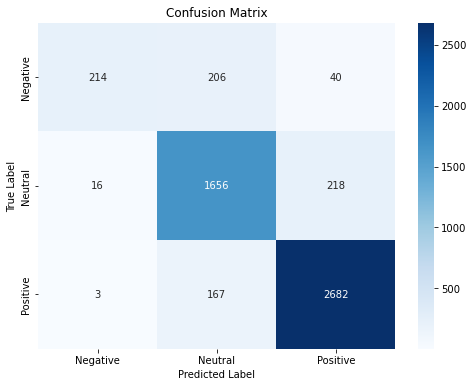

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv("C:/Users/user/Desktop/text assessment 3/data_for_sentiment_analyzis/amazon_reviews.csv")

# Pre-process the data
df = df.dropna()  # Remove any rows with missing data
df['cleaned_review'] = df['cleaned_review'].str.lower()  # Convert all text to lowercase

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiments'], test_size=0.3, stratify=df['sentiments'], random_state=42)

# Extract features from the training set
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train a model
clf = SVC()
clf.fit(X_train_vectorized, y_train)

# Evaluate the model on the testing set
X_test_vectorized = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_vectorized)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Sentiment Analysis Approach 2

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.61      0.68       460
     neutral       0.83      0.89      0.86      1890
    positive       0.94      0.93      0.93      2852

    accuracy                           0.89      5202
   macro avg       0.85      0.81      0.82      5202
weighted avg       0.89      0.89      0.88      5202



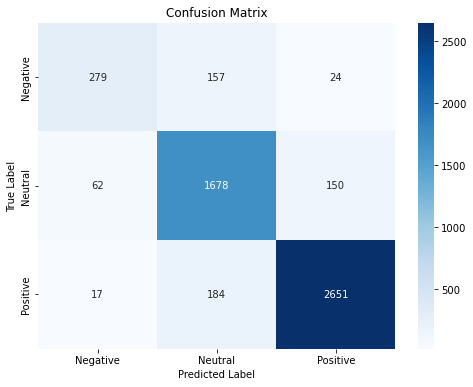

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv("C:/Users/user/Desktop/text assessment 3/data_for_sentiment_analyzis/amazon_reviews.csv")

# Pre-process the data
df = df.dropna()  # Remove any rows with missing data
df['cleaned_review'] = df['cleaned_review'].str.lower()  # Convert all text to lowercase

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiments'], test_size=0.3, stratify=df['sentiments'], random_state=42)

# Extract features from the training set using N-grams
ngram_range = (1, 2)  # Consider both unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=ngram_range)
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train_vectorized, y_train)

# Evaluate the model on the testing set
X_test_vectorized = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_vectorized)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Text Classification, SVM, TfidfVectorizer version 1

In [ ]:
uses the SMOTE to balance the training data,  GridSearchCV to tune the hyperparameters of the SVC model

Version 2
Accuracy: 0.9883351007423118

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.96      1.00      0.98       189
           2       1.00      0.77      0.87        26
           3       0.99      0.99      0.99       166
           4       1.00      1.00      1.00        63
           5       0.99      0.99      0.99       210
           6       0.99      0.99      0.99       189

    accuracy                           0.99       943
   macro avg       0.99      0.96      0.98       943
weighted avg       0.99      0.99      0.99       943



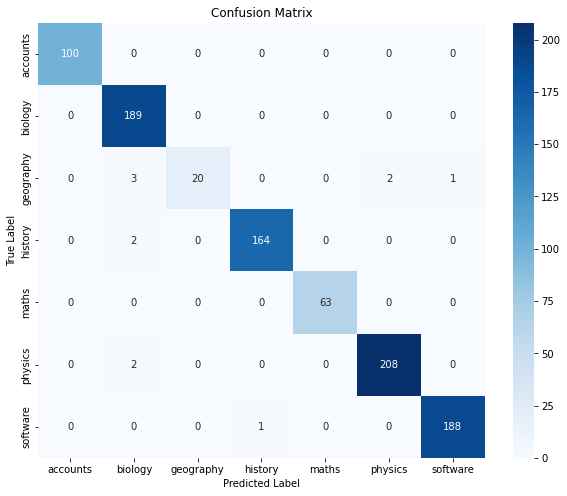

In [109]:
import os
import random
import glob
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import check_array
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt

main_path = "C:/Users/user/Desktop/text assessment 3/data_for_topic_labelling"
sub_paths = [
    "/accounts",
    "/biology",
    "/geography",
    "/history",
    "/maths",
    "/physics",
    "/software"
]

# Load the data
documents, labels = [], []
for i, sub_path in enumerate(sub_paths):
    file_paths = glob.glob(main_path + sub_path + '/*.txt')
    for file_path in file_paths:
        with open(file_path, encoding='utf-8') as f:
            text = f.read()
            documents.append(text)
            labels.append(sub_path.split('/')[-1])

# Preprocess the data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_tfidf = vectorizer.fit_transform(documents)

# Dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=500)
X_reduced = svd.fit_transform(X_tfidf)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Balance the training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the classifier and tune hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)
best_svm = grid_search.best_estimator_

# Predict on the test data
y_pred = best_svm.predict(X_test)

# Evaluate the model
score = accuracy_score(y_test, y_pred)
print("Version 1")
print(f"Accuracy: {score}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Text Classification using Logistic Regression. Approach 2

Version 2
Accuracy: 0.9862142099681867

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.97      0.99      0.98       189
           2       0.96      0.85      0.90        26
           3       0.99      0.99      0.99       166
           4       1.00      1.00      1.00        63
           5       0.99      0.99      0.99       210
           6       0.99      0.98      0.99       189

    accuracy                           0.99       943
   macro avg       0.98      0.97      0.98       943
weighted avg       0.99      0.99      0.99       943



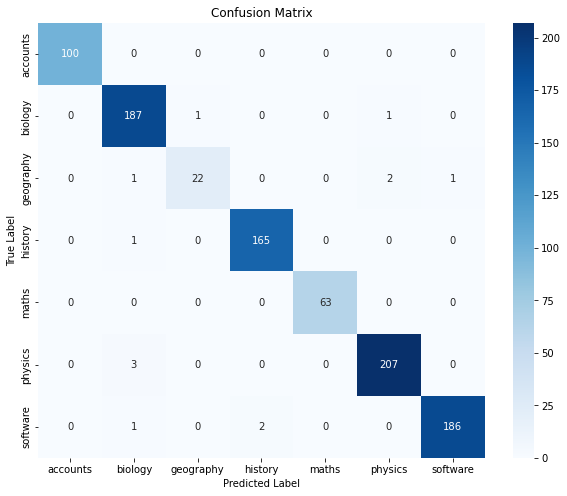

In [119]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Load the data
documents, labels = [], []
for i, sub_path in enumerate(sub_paths):
    file_paths = glob.glob(main_path + sub_path + '/*.txt')
    for file_path in file_paths:
        with open(file_path, encoding='utf-8') as f:
            text = f.read()
            documents.append(text)
            labels.append(sub_path.split('/')[-1])

# Preprocess the data using stemming
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, tokenizer=lambda text: text.split())
X_tfidf = vectorizer.fit_transform(documents)

# Dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=500)
X_reduced = svd.fit_transform(X_tfidf)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Balance the training data
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the classifier and tune hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)
best_logreg = grid_search.best_estimator_

# Predict on the test data
y_pred = best_logreg.predict(X_test)

# Evaluate the model
score = accuracy_score(y_test, y_pred)
print("Version 2")
print(f"Accuracy: {score}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# TEXT TO SPEECH

In [14]:
import pyttsx3

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Define a function to generate the voice message
def generate_voice_message(movie_title, director, num_reviews, num_mentions, avg_score):
    # Define the message template
    message = f"You have required information about {movie_title} movie, the director of this movie is {director}, there is a total of {num_reviews} reviews of this movie in the database, there are {num_mentions} mentions of this movie in other movies reviews. The average review score for this movie is {avg_score}, which makes it a {'GOOD' if avg_score >= 7 else 'BAD'} recommendation to watch."
    # Set the properties of the voice message
    engine.setProperty('rate', 150) # Set the speaking rate
    engine.setProperty('volume', 5) # Set the volume
    # Generate the voice message
    engine.say(message)
    engine.runAndWait()

# Call the function to generate the voice message
generate_voice_message("The Lion King", "Roger Allers", 4, 18, 7.0)
